# **Projet 3 - <span style="color:#35B890">Concevoir une application au service de la santé publique</span>**

**<span style="color:#35B890">Objectif de la mission</span>** - Réponse à l'AAP de <a href="https://www.santepubliquefrance.fr/">Santé public France</a> concernant une idée d'application en lien avec l'alimentation.

**<span style="color:#35B890">Source des données</span>** - Les données sont issues de l'association <a href="https://world.openfoodfacts.org/">Open Food Facts</a> qui a pour but de mettre à disposition des consommateurs les données des produits alimentaires. Pour une meilleure compréhension des données, une description est <a href="">disponible à cette page</a>.

**<span style="color:#35B890">Présentation de l'application choisie</span>**
<p>Dans le cadre du développement de nouveaux produits destinés à améliorer la qualité de vie et le bien-être de la population, le service R&D développe un outil permetant de rééquilibrer les habitudes alimentaire. Le but est de restranscrire les repas en informations nutritionnelles afin de proposer des menus plus équilibrés. Les produits issus de territoires français seront utilisés pour la conception des menus ainsi que la qualité des nutriments.</p>

**<span style="color:#35B890">Les différentes étapes:</span>**
1. Collecte des données (repas consommés)
2. Transcription en valeurs nutrionnelles
3. Comparaison entre la consommation et les Apports Nutritionnels Conseillés (ANC)
4. Analyse des habitudes de consommation (Régime alimentaire, allergies, ...)
5. Proposition de menus respectants les ANC et les Apports Journaliers recommandés (AJR)

---

**<span style="color:#35B890">Objectif du notebook</span> - Concevoir une base de données exploitable pour la réalisation du projet d'application**

**Notebook de nettoyage:**
1. Description des données
2. Nettoyage des données
   1. *Suppression des données inexploitables*
   2. *Sélection des produits issus des territoires français*
   3. *Traitement des informations produit*
      1. *Sélection des variables pertinentes*
      2. *Traitement des données*
   4. *Traitement des informations nutritionnelles*
      1. *Sélection des variables pertinentes*
      2. *Traitement des données*
3. Imputation des données manquantes (nutriments)
   1. *Moyenne par colonne*
   2. *Moyenne par catégorie*
   3. *KNN-Imputer*

**Notebook d'analyse:**

4. Analyse statistique des données

## **0. Importation des librairies et des données**
---

In [1]:
# import os
# Importing python librairies
import pandas as pd
import numpy as np
import sklearn as sl
from sklearn.impute import KNNImputer
from scipy.stats import zscore
import scipy.stats as stats
from wordcloud import WordCloud
import random
# Importing DataViz librairies
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
# from matplotlib.ticker import ScalarFormatter

In [2]:
# Import the dataset MAC
#food = "/Users/remi/Documents/FoodFact/foodfact.csv"
#df_food = pd.read_csv(food, sep="\t", low_memory=False)

In [3]:
# Import the dataset PC
food = "C:/Users/remid/Documents/_OC_ParcoursDataScientist/P3_Concevez_Une_Application_Au_Service_De_La_Sante_Publique/OpenFoodFact/foodfact.csv"
df_food = pd.read_csv(food, sep="\t", low_memory=False)

### Charte graphique

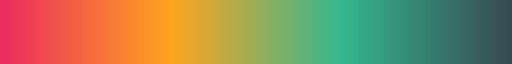

In [4]:
# Define the color
first_color = "#EB2D5F"  # Couleur pour les valeurs inférieures
under_color = '#ffa51f'  # Couleur pour les valeurs inférieures
over_color = '#384B52'   # Couleur pour les valeurs supérieures
# Create a personal color map 
colors = [first_color,under_color, '#35B890', over_color]
n_bins = 100
cmap_name = 'custom_colormap'
palette = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)
palette

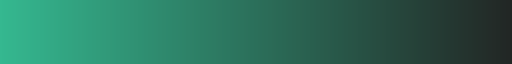

In [5]:
# Continuous colour palette for the various graphics
palette_b = sns.dark_palette("#35B890", reverse=True, as_cmap=True)
palette_b

In [6]:
# Colour palette for the various graphics
palette_map = sns.color_palette("dark:#35B890", n_colors=len(df_food.isnull().sum()),as_cmap=False)
palette_map

[(0.13521666301722216, 0.15155479605253716, 0.1443874221608451),
 (0.135501472720115, 0.15379014441096242, 0.14603572984787294),
 (0.13607109212590074, 0.15826084112781297, 0.1493323452219286),
 (0.1363559018287936, 0.16049618948623823, 0.1509806529089564),
 (0.13692552123457932, 0.16496688620308878, 0.15427726828301208),
 (0.1372103309374722, 0.16720223456151403, 0.1559255759700399),
 (0.1377799503432579, 0.17167293127836458, 0.15922219134409554),
 (0.13834956974904364, 0.1761436279952151, 0.16251880671815122),
 (0.1386343794519365, 0.17837897635364036, 0.16416711440517903),
 (0.13920399885772222, 0.1828496730704909, 0.16746372977923468),
 (0.13948880856061507, 0.18508502142891617, 0.16911203746626252),
 (0.1400584279664008, 0.18955571814576672, 0.17240865284031817),
 (0.14062804737218654, 0.19402641486261724, 0.17570526821437382),
 (0.1409128570750794, 0.1962617632210425, 0.17735357590140166),
 (0.14148247648086512, 0.20073245993789304, 0.1806501912754573),
 (0.14176728618375797, 0.2029678082963183, 0.18229849896248512),
 (0.1423369055895437, 0.20743850501316885, 0.1855951143365408),
 (0.14290652499532944, 0.21190920173001937, 0.18889172971059645),
 (0.1431913346982223, 0.21414455008844463, 0.19054003739762426),
 (0.14376095410400802, 0.21861524680529518, 0.19383665277167994),
 (0.14404576380690087, 0.22085059516372046, 0.19548496045870775),
 (0.1446153832126866, 0.22532129188057098, 0.1987815758327634),
 (0.14490019291557946, 0.22755664023899624, 0.20042988351979124),
 (0.1454698123213652, 0.2320273369558468, 0.2037264988938469),
 (0.14603943172715092, 0.23649803367269734, 0.20702311426790254),
 (0.14632424143004377, 0.2387333820311226, 0.20867142195493038),
 (0.1468938608358295, 0.24320407874797312, 0.21196803732898603),
 (0.14717867053872236, 0.24543942710639838, 0.21361634501601387),
 (0.1477482899445081, 0.24991012382324893, 0.21691296039006952),
 (0.14831790935029382, 0.2543808205400995, 0.22020957576412517),
 (0.14860271905318667, 0.25661616889852473, 0.221857883451153),
 (0.1491723384589724, 0.26108686561537525, 0.22515449882520866),
 (0.14945714816186526, 0.2633222139738005, 0.2268028065122365),
 (0.150026767567651, 0.26779291069065103, 0.23009942188629212),
 (0.1505963869734367, 0.2722636074075016, 0.2333960372603478),
 (0.15088119667632957, 0.27449895576592687, 0.23504434494737564),
 (0.1514508160821153, 0.2789696524827774, 0.23834096032143126),
 (0.15173562578500815, 0.2812050008412027, 0.2399892680084591),
 (0.1523052451907939, 0.2856756975580532, 0.24328588338251478),
 (0.1528748645965796, 0.29014639427490374, 0.2465824987565704),
 (0.15315967429947247, 0.29238174263332906, 0.24823080644359824),
 (0.15372929370525817, 0.2968524393501795, 0.25152742181765386),
 (0.15401410340815105, 0.2990877877086048, 0.2531757295046817),
 (0.15458372281393679, 0.30355848442545535, 0.2564723448787374),
 (0.15486853251682964, 0.3057938327838806, 0.2581206525657652),
 (0.15543815192261537, 0.31026452950073113, 0.2614172679398209),
 (0.15600777132840107, 0.31473522621758165, 0.2647138833138765),
 (0.15629258103129395, 0.31697057457600697, 0.26636219100090436),
 (0.15686220043707966, 0.3214412712928575, 0.26965880637496),
 (0.15714701013997254, 0.32367661965128275, 0.2713071140619878),
 (0.15771662954575827, 0.3281473163681333, 0.2746037294360435),
 (0.15828624895154397, 0.33261801308498384, 0.2779003448100992),
 (0.15857105865443683, 0.33485336144340905, 0.27954865249712696),
 (0.15914067806022256, 0.3393240581602596, 0.28284526787118264),
 (0.15942548776311544, 0.3415594065186849, 0.2844935755582104),
 (0.15999510716890114, 0.3460301032355354, 0.2877901909322661),
 (0.16056472657468687, 0.3505007999523859, 0.2910868063063218),
 (0.16084953627757972, 0.35273614831081124, 0.2927351139933496),
 (0.16141915568336546, 0.35720684502766176, 0.29603172936740524),
 (0.1617039653862583, 0.359442193386087, 0.2976800370544331),
 (0.16227358479204404, 0.3639128901029376, 0.3009766524284887),
 (0.16255839449493692, 0.3661482384613628, 0.302624

In [7]:
# Reverse the order of colours in the palette list
palette_map = list(reversed(palette_map))

## **1. Description des données**
***

In [8]:
# Describe dataset
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


In [9]:
# View random data
df_food.sample(3)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
6670,0011152185255,http://world-fr.openfoodfacts.org/produit/0011...,usda-ndb-import,1489063446,2017-03-09T12:44:06Z,1489063446,2017-03-09T12:44:06Z,Pickled Ginger,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270381,5000354901232,http://world-fr.openfoodfacts.org/produit/5000...,delicesnovice,1411396260,2014-09-22T14:31:00Z,1411396594,2014-09-22T14:36:34Z,Sauce Worcester,NaN,150ml,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274052,5054268423526,http://world-fr.openfoodfacts.org/produit/5054...,bcatelin,1425502425,2015-03-04T20:53:45Z,1479626368,2016-11-20T07:19:28Z,6 british Free-range eggs,free range eggs,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


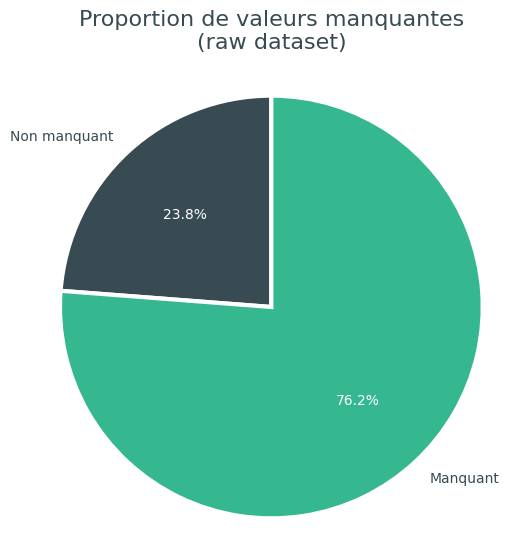

In [10]:
# Calculation of the average percentage of missing values
missing_percentage = df_food.isna().mean().mean()*100
# Calculation of the proportion of non-missing values
non_missing_percentage = 100 - missing_percentage

# Data for pie chart
data = [non_missing_percentage, missing_percentage]
labels = ["Non manquant", "Manquant"]
# Define color code
colors = ["#384B52",'#35B890']

# Create pie chart
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(
    data, labels=labels,
    startangle=90, colors=colors, autopct="%1.1f%%",
    wedgeprops = {"linewidth": 3, "edgecolor": "white"})
# Set title on pie chart
plt.title("Proportion de valeurs manquantes\n(raw dataset)",pad=20,color="#384B52",fontsize=16)
# Customise label colours and sizes
plt.setp(texts + autotexts, color="#384B52", fontsize=10)
plt.setp(autotexts, color="white")
# Pie chart display
plt.axis("equal")
plt.show()

In [11]:
# Information on data quality
print("Nb de colonne sans données: {}".format(df_food.columns[df_food.isnull().all()].shape[0]))
print("Nb de lignes sans données : {}".format(df_food.isna().all(axis=1).sum()))
print("Nb de lignes dupliquées : {}".format(df_food.duplicated().sum()))
print("Nb d'identifiant uniques dupliqués' : {}".format(df_food["code"].duplicated().sum()))

Nb de colonne sans données: 16
Nb de lignes sans données : 0
Nb de lignes dupliquées : 0
Nb d'identifiant uniques dupliqués' : 22


## **2. Nettoyage des données**
***

Dans un premier temps, il s'agit de supprimer les variables inutiles et les données qui ne comportent pas suffisemment d'informations pour être exploiter. Un seuil de 25% de données disponible est fixé pour la sélection des variables. Afin de promouvoir les produits locaux, seul les produits issus des territoires français seront sélectionnés.

### **1. Suppression des données inexploitables**

Pour commencer, les colonnes n'ayant aucune valeurs sont supprimées.

In [12]:
# Delete columns containing only null values
df_food.dropna(axis=1, how="all", inplace=True)

Puis, l'analyse du taux de remplissage par variables permet de visualiser la qualité du jeu de donnée et d'observer les colonnes concernés par le seuil de 25% établis précédemment.

In [13]:
# Instantiation of the percentage of missing values for each column
null_value_rates = df_food.notnull().mean()*100
# Missing data formatted as a DataFrame (in descending order)
df_null_values = pd.DataFrame({"column_name":df_food.columns,"null_value_rates":null_value_rates.values})
df_null_values = df_null_values.sort_values(by="null_value_rates",ascending=False)

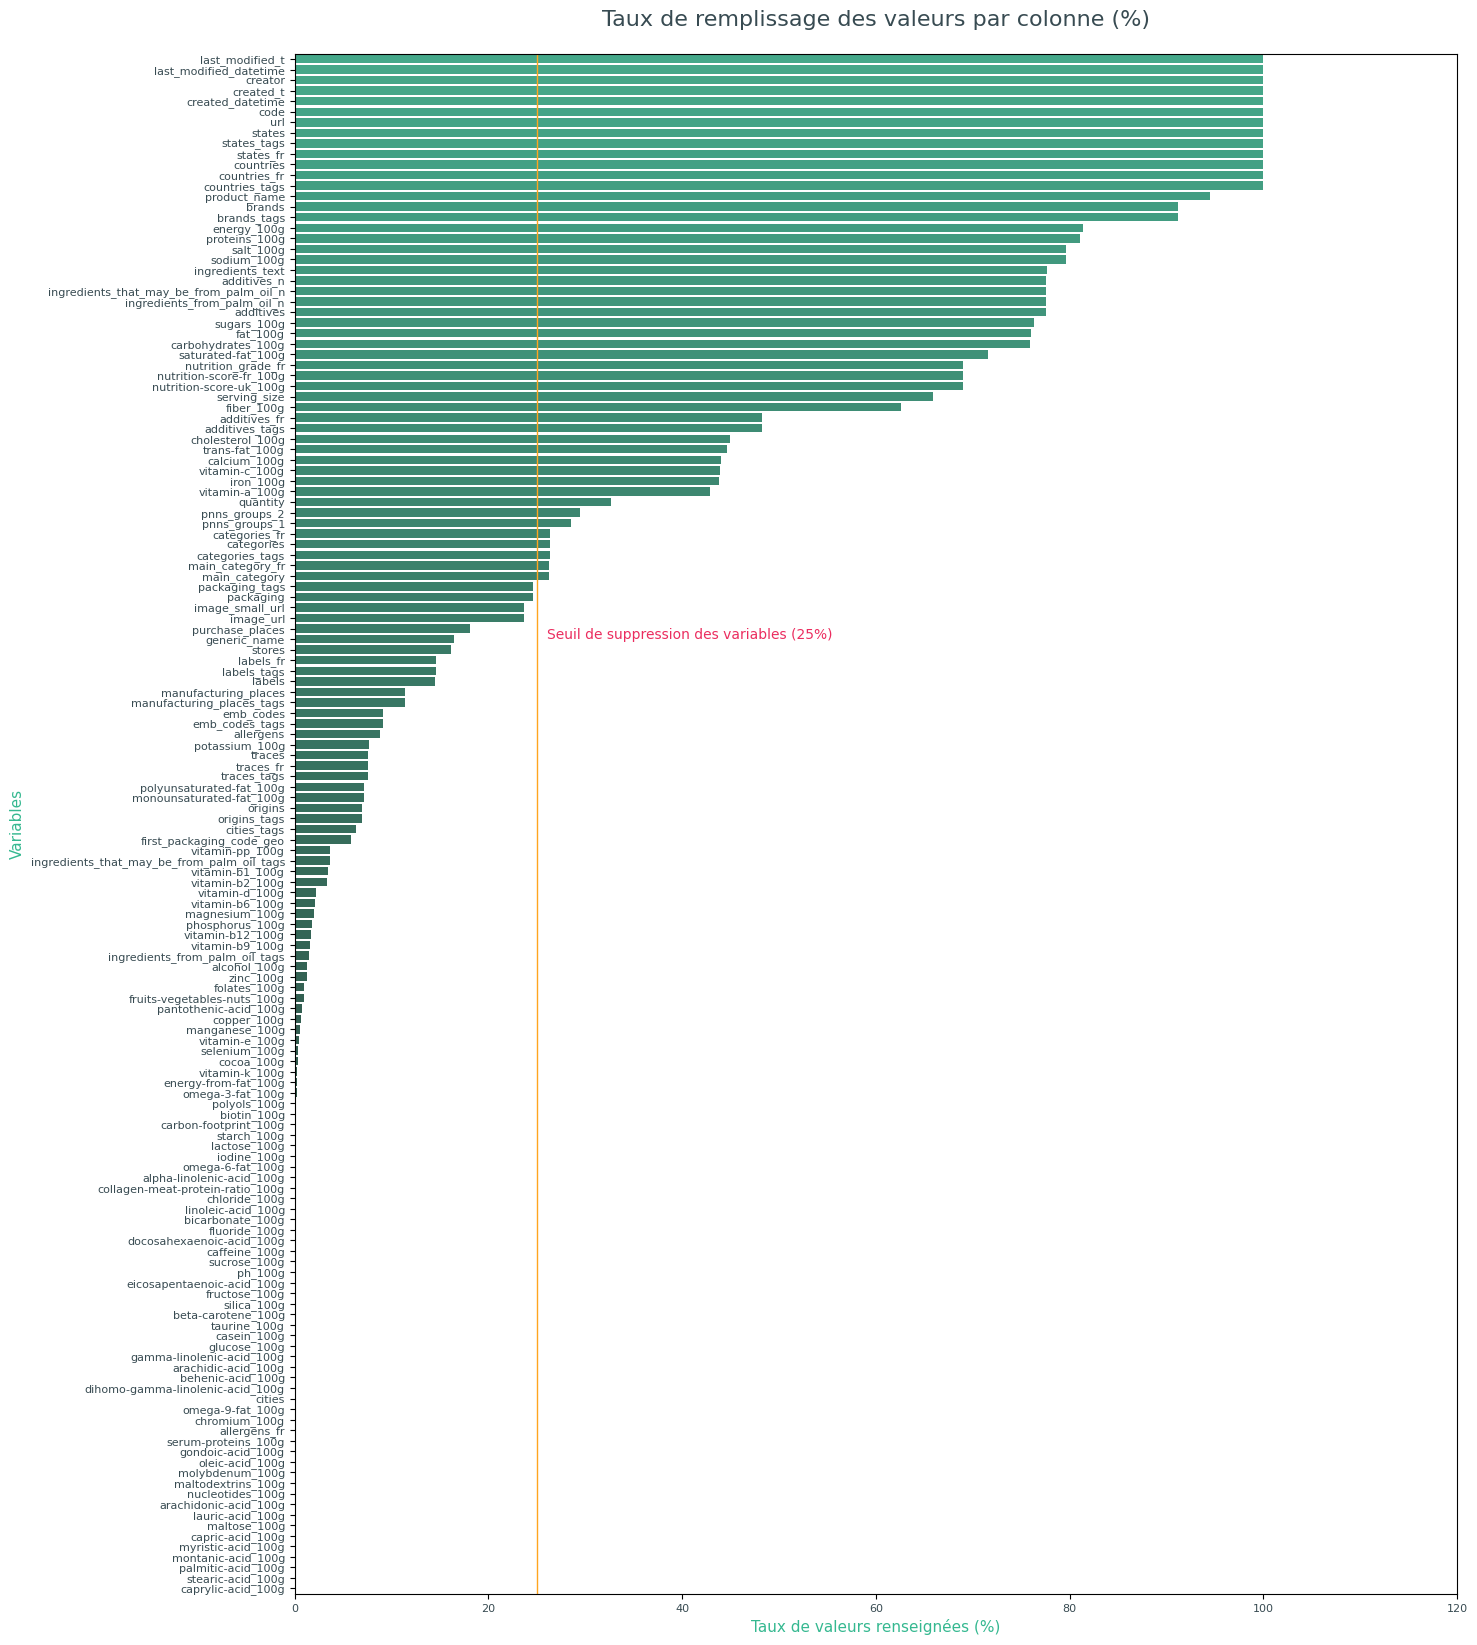

In [14]:
# Observation of zero values (average per column)
plt.figure(figsize=(15,20))
ax = sns.barplot(data=df_null_values,x="null_value_rates",y="column_name",palette=palette_map)
plt.title("Taux de remplissage des valeurs par colonne (%)",pad=20,color="#384B52",fontsize=16)
# Display of a threshold line
plt.axvline(x=25, linewidth=1, color = '#ffa51f')
plt.text(25+1, 55, 'Seuil de suppression des variables (25%)', fontsize = 10, color = '#EB2D5F')
# Specifies the location of x-axis labels
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), color='#384B52', fontsize=8)
# Specifies the location of y-axis labels
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticklabels(), color='#384B52', fontsize=8)
# Customise x and y axis labels
plt.xlabel("Taux de valeurs renseignées (%)",color='#35B890', fontsize=11)
plt.ylabel("Variables",color='#35B890', fontsize=11)
plt.show()

Visualisation de la proportions des valeurs manquantes par groupe de colonnes. En effet, nous pouvons distinguer un groupe de variables dites qualitatives et quantitatives.

In [15]:
# Instantiation of columns containing < 75% null values and not containing "100g".
nan_more_75_quali = df_food.loc[:, (df_food.isna().mean() > 0.75) & (~df_food.columns.str.contains("100g"))].columns
# Instantiation of containing < 75% null values and containg "100g"
nan_more_75_quanti = df_food.loc[:, (df_food.isna().mean() > 0.75) & (df_food.columns.str.contains("100g"))].columns

In [16]:
# Instantiation of columns into 2 distinct groups
col_quali = df_food.loc[:,~df_food.columns.str.contains("100g")].columns
col_quanti = df_food.loc[:,df_food.columns.str.contains("100g")].columns

In [17]:
# Counts the number of columns with more than 75% missing values per column group.
col_quali_deleted = col_quali.isin(nan_more_75_quali.tolist()).sum()
col_quanti_deleted = col_quanti.isin(nan_more_75_quanti.tolist()).sum()
# Counts the number of columns with +25% values per column group
col_quali_ok = len(col_quali) - col_quali.isin(nan_more_75_quali.tolist()).sum()
col_quanti_ok = len(col_quanti) - col_quanti.isin(nan_more_75_quanti.tolist()).sum()

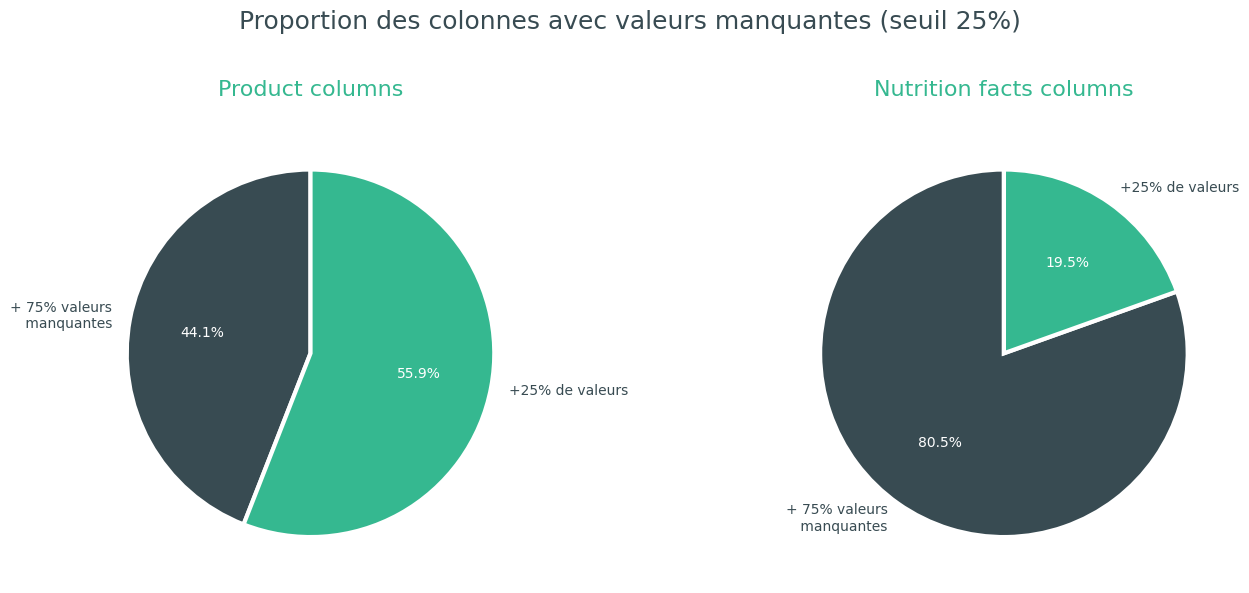

In [18]:
# Data for pie chart - qualitative columns
data_quali = [col_quali_deleted, col_quali_ok]
labels_quali = ["+ 75% valeurs\n manquantes", "+25% de valeurs"]
colors = ["#384B52", '#35B890']

# Data for pie chart - quantitative columns
data_quanti = [col_quanti_deleted, col_quanti_ok]
labels_quanti = ["+ 75% valeurs\n manquantes", "+25% de valeurs"]

fig, axs = plt.subplots(1, 2, figsize=(14, 6))
# Add a global title
plt.suptitle("Proportion des colonnes avec valeurs manquantes (seuil 25%)\n", fontsize=18, color="#384B52")

# Create pie chart for qualitative columns
patches, texts, autotexts = axs[0].pie(
    data_quali, labels=labels_quali,
    startangle=90, colors=colors, autopct="%1.1f%%",
    wedgeprops={"linewidth": 3, "edgecolor": "white"})
axs[0].set_title("Product columns", pad=20, color="#35B890", fontsize=16)

# Set custom label colors and sizes for qualitative pie chart
for text in texts:
    text.set_color("#384B52")
    text.set_fontsize(10)
for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontsize(10)

# Create pie chart for quantitative columns
patches, texts, autotexts = axs[1].pie(
    data_quanti, labels=labels_quanti,
    startangle=90, colors=colors, autopct="%1.1f%%",
    wedgeprops={"linewidth": 3, "edgecolor": "white"})
axs[1].set_title("Nutrition facts columns", pad=20, color="#35B890", fontsize=16)

# Set custom label colors and sizes for quantitative pie chart
for text in texts:
    text.set_color("#384B52")
    text.set_fontsize(10)
for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontsize(10)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

Brève analyse des colonnes ne respectant pas le seuil de 25% afin d'identifier la présence d'informations pertinentes avant leur suppressions.

In [19]:
# Check values on allergens column
df_food.loc[df_food["allergens"].notnull(),["code","allergens"]].sample(5)

,code,allergens
204819,3248833085130,"blé, gluten, œufs, sulfites, crème, blé, beurre"
180643,20593643,"soja, lait, noisette, Iait, lait, soja, noiset..."
269726,5000159486644,"lait, lait, lactose, cacahuètes, blé, lait, la..."
281317,5603152008587,"trigo, centeio, centeio, trigo, trigo, cevada,..."
269600,5000159437943,"lait, orge, lait, lactose, lait, blé, soja"


In [20]:
# Check values on ingredients_from_palm_oil_tags column
df_food.loc[df_food["ingredients_from_palm_oil_tags"].notnull(),["code","ingredients_from_palm_oil_tags"]].sample(5)

,code,ingredients_from_palm_oil_tags
256850,4001518107867,huile-de-palme
286417,7610062962050,huile-de-palme
288368,7610800018315,huile-de-palme
311802,8480017119957,e304-palmitate-d-ascorbyle
289974,7610849627912,huile-de-palme


In [21]:
# Check values on traces_fr column
df_food.loc[df_food["traces_fr"].notnull(),["code","traces_fr"]].sample(5)

,code,traces_fr
264929,4271167477363,Œufs
186911,2927947001847,es:Pistachos
234687,3472860001553,"Fruits à coque,Graines de sésame,Soja"
297099,7617014134213,Anhydride sulfureux et sulfites
227704,3350033078857,Fruits à coque


La vérification des colonnes qui ne respectent pas le seuil de 25% de données renseignées permet d'identifier 2 variables pertinentes. Les informations sur les allergènes et la présence d'huile de palme peuvent servir à l'idée d'application. La présence d'un grand nombre de valeurs manquantes pour ces variables n'est pas synonyme d'un manque d'information mais signifie que peu de produits sont concernés par ces informations.

In [22]:
# Selection of columns potentially useful for analysis
columns_to_keep = ["allergens","ingredients_from_palm_oil_tags"]

La suppression des colonnes qui ne respecte pas le seuil de 25% peut maintenant être effectuée en conservant les 3 variables identifiées précedemment.

In [23]:
# Selection of columns containing < 75% null values and columns_to_keep
df_food_v1 = df_food.loc[:, (df_food.isna().mean() < 0.75) | (df_food.columns.isin(columns_to_keep))]

Comparaison de la proportion de valeurs manquantes après la suppression des colonnes qui ne dépassent pas la valeur seuil.

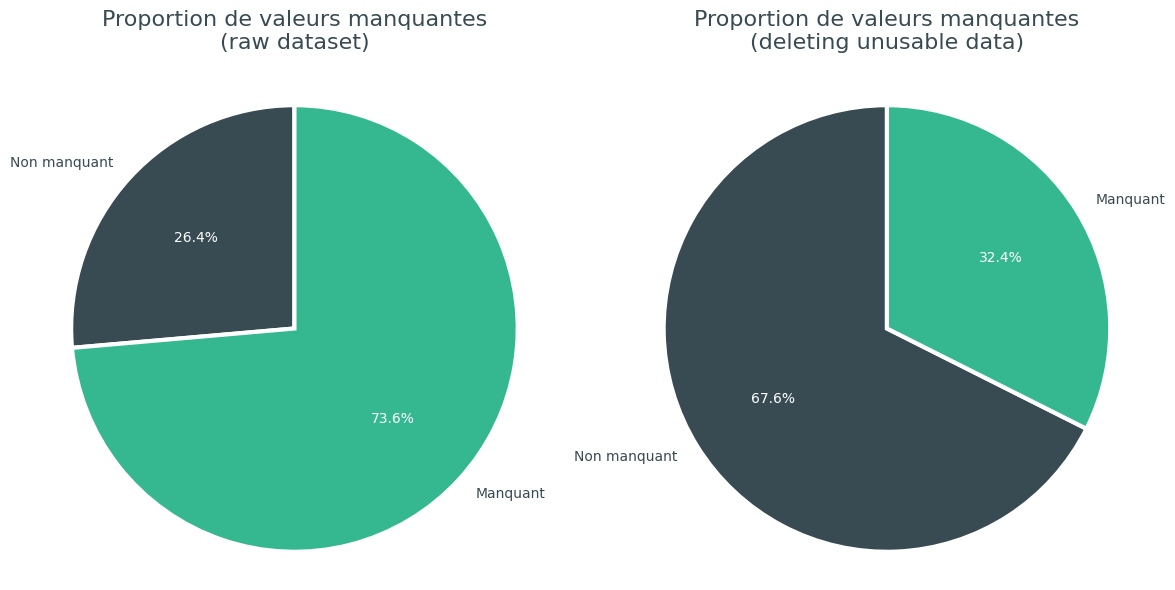

In [24]:
# Calculation of the average percentage of missing values
missing_percentage = df_food.isna().mean().mean() * 100
# Calculation of the proportion of non-missing values
non_missing_percentage = 100 - missing_percentage

#v1
missing_percentage_v1 = df_food_v1.isna().mean().mean() * 100
# Calculation of the proportion of non-missing values
non_missing_percentage_v1 = 100 - missing_percentage_v1

# Data for pie chart
data = [non_missing_percentage, missing_percentage]
data_v1 = [non_missing_percentage_v1, missing_percentage_v1]
labels = ["Non manquant", "Manquant"]
# Define color code
colors = ["#384B52", '#35B890']

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Create pie chart for raw dataset
patches1, texts1, autotexts1 = axes[0].pie(
    data, labels=labels,
    startangle=90, colors=colors, autopct="%1.1f%%",
    wedgeprops={"linewidth": 3, "edgecolor": "white"})
# Set title on pie chart
axes[0].set_title("Proportion de valeurs manquantes\n(raw dataset)", pad=20, color="#384B52", fontsize=16)
# Customise label colours and sizes
plt.setp(texts1 + autotexts1, color="#384B52", fontsize=10)
plt.setp(autotexts1, color="white")
# Equal aspect ratio ensures that pie is drawn as a circle.
axes[0].axis("equal")

# Create pie chart for deleting unusable data
patches2, texts2, autotexts2 = axes[1].pie(
    data_v1, labels=labels,
    startangle=90, colors=colors, autopct="%1.1f%%",
    wedgeprops={"linewidth": 3, "edgecolor": "white"})
# Set title on pie chart
axes[1].set_title("Proportion de valeurs manquantes\n(deleting unusable data)", pad=20, color="#384B52", fontsize=16)
# Customise label colours and sizes
plt.setp(texts2 + autotexts2, color="#384B52", fontsize=10)
plt.setp(autotexts2, color="white")
# Equal aspect ratio ensures that pie is drawn as a circle.
axes[1].axis("equal")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

### **2. Sélection des produits issus des territoires français**

Maintenant que les données inexploitables sont écartées, la prochaine étapes consiste à sélectionner les produits issus des territoires français. Les territoires sont répertoriés sur le site web de l'INSEE à <a href="https://www.insee.fr/fr/metadonnees/definition/c1696">cette page</a> et serviront de référence pour filtrer les produits de la base de données.

Pour commencer, les lignes qui n'ont pas d'informations sur la provenance des produits sont supprimées.

In [25]:
# Delete rows for null values in countries_fr columns
df_food_v1 = df_food_v1.dropna(subset="countries_fr", axis=0)

Puis les produits issus des territoires français sont sélectionnés afin d'obtenir un jeu de données conforme à nos besoins.

In [26]:
# Data selection for French countries only
df_food_fr = df_food_v1.loc[df_food_v1["countries_fr"].str.contains("France|française|Guadeloupe|Nouvelle-Calédonie|Martinique|La Réunion|Polynésie française|Mayotte|Wallis-et-Futuna|Saint-Pierre-et-Miquelon|Saint-Martin")]

Enfin, il est intéressant de visualiser la proportion de produits issus des territoires français par rapport au reste du monde.

In [27]:
# Instantiation of entries containing the name of a French territory
list_fr_countries = df_food_fr["countries_fr"].unique().tolist()

# Source categorisation function
def country_categ(country):
    if country in list_fr_countries:
      return "Territoires français"
    else:
      return "Reste du monde"

In [28]:
# Create a dataframe for analysis
df_proportion_french_products = pd.DataFrame(columns=["provenance"])
# Apply the function to obtain the origin of the products
df_proportion_french_products["provenance"] = df_food["countries_fr"].apply(country_categ)

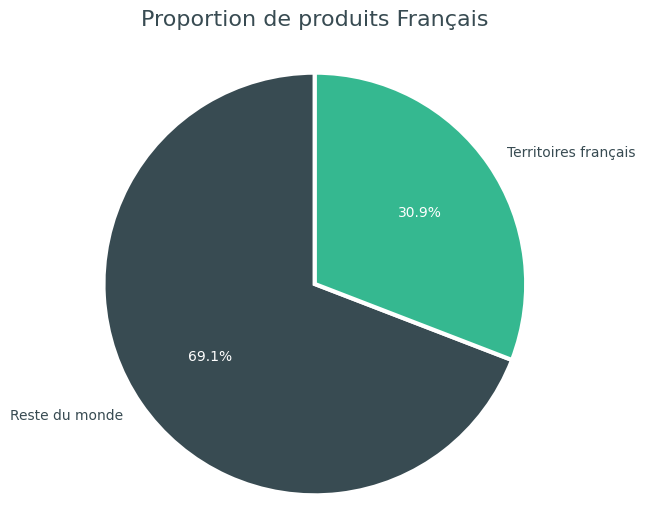

In [29]:
# Count the number of products by origin
provenance_counts = df_proportion_french_products["provenance"].value_counts()
# Define color code
colors = ["#384B52",'#35B890']

# Create pie chart
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(
    provenance_counts, labels=provenance_counts.index,
    startangle=90, colors=colors, autopct="%1.1f%%",
    wedgeprops = {"linewidth": 3, "edgecolor": "white"})
# Set title on pie chart
plt.title("Proportion de produits Français",pad=20,color="#384B52",fontsize=16)
# Customise label colours and sizes
plt.setp(texts + autotexts, color="#384B52", fontsize=10)
plt.setp(autotexts, color="white")
# Pie chart display
plt.axis("equal")
plt.show()

Comparaison de la proportion de valeurs manquantes après la sélection des produits issus des territoires français

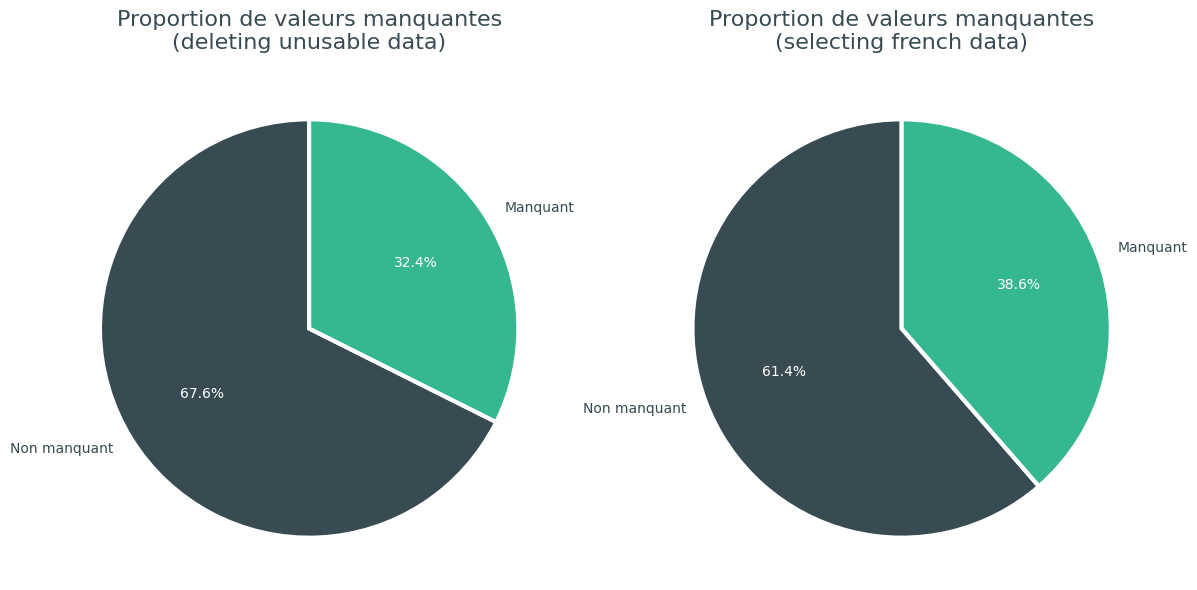

In [30]:
# Calculation of the average percentage of missing values
missing_percentage_fr = df_food_fr.isna().mean().mean()*100
# Calculation of the proportion of non-missing values
non_missing_percentage_fr = 100 - missing_percentage_fr

#v1
missing_percentage_v1 = df_food_v1.isna().mean().mean() * 100
# Calculation of the proportion of non-missing values
non_missing_percentage_v1 = 100 - missing_percentage_v1

# Data for pie chart
data_v1 = [non_missing_percentage_v1, missing_percentage_v1]
# Data for pie chart
data_fr = [non_missing_percentage_fr, missing_percentage_fr]
labels = ["Non manquant", "Manquant"]
# Define color code
colors = ["#384B52", '#35B890']

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Create pie chart for raw dataset
patches1, texts1, autotexts1 = axes[0].pie(
    data_v1, labels=labels,
    startangle=90, colors=colors, autopct="%1.1f%%",
    wedgeprops={"linewidth": 3, "edgecolor": "white"})
# Set title on pie chart
axes[0].set_title("Proportion de valeurs manquantes\n(deleting unusable data)", pad=20, color="#384B52", fontsize=16)
# Customise label colours and sizes
plt.setp(texts1 + autotexts1, color="#384B52", fontsize=10)
plt.setp(autotexts1, color="white")
# Equal aspect ratio ensures that pie is drawn as a circle.
axes[0].axis("equal")

# Create pie chart for deleting unusable data
patches2, texts2, autotexts2 = axes[1].pie(
    data_fr, labels=labels,
    startangle=90, colors=colors, autopct="%1.1f%%",
    wedgeprops={"linewidth": 3, "edgecolor": "white"})
# Set title on pie chart
axes[1].set_title("Proportion de valeurs manquantes\n(selecting french data)", pad=20, color="#384B52", fontsize=16)
# Customise label colours and sizes
plt.setp(texts2 + autotexts2, color="#384B52", fontsize=10)
plt.setp(autotexts2, color="white")
# Equal aspect ratio ensures that pie is drawn as a circle.
axes[1].axis("equal")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

### **3. Gestion des données par catégorie (quali/quanti)**

Les données inexploitables étant exclues, il est nécessaire de faire le tri des variables en sélectionnant les plus pertinentes pour le projet. Pour cela, la <a href="https://world.openfoodfacts.org/data/data-fields.txt">page de description des variables</a> sert de support méthodologique. Pour commencer, il est intéressant d'afficher la proportion des variables par catégorie. 

In [31]:
col_quali = len(df_food_fr.loc[:,~df_food_v1.columns.str.contains("100g")].columns)
col_quanti = len(df_food_fr.loc[:,df_food_v1.columns.str.contains("100g")].columns)

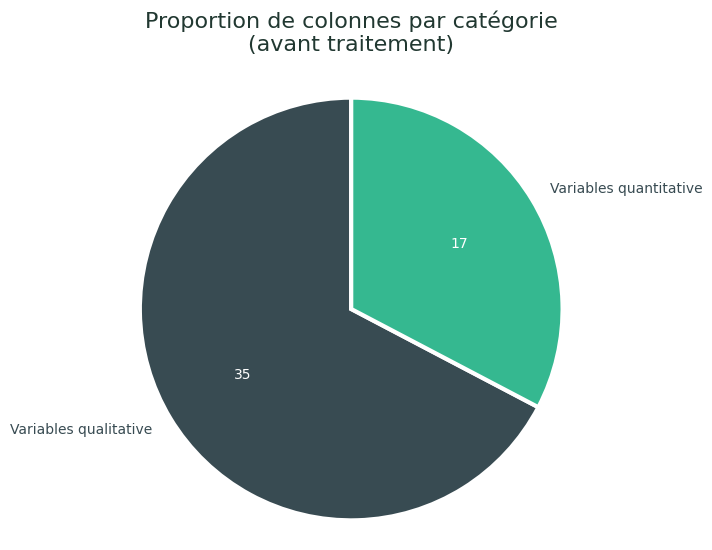

In [32]:
# Category names for display
categories = ["Variables qualitative", "Variables quantitative"]
# Number of columns in each category
data = [col_quali, col_quanti]

# Define color code
colors = ["#384B52",'#35B890']

# Create pie chart
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(
    data, labels=categories,
    startangle=90, colors=colors, autopct=lambda p: '{:.0f}'.format(p * sum(data) / 100), wedgeprops = {"linewidth": 3, "edgecolor": "white"})
# Set title on pie chart
plt.title("Proportion de colonnes par catégorie\n(avant traitement)",pad=20,color="#213831",fontsize=16)
# Customise label colours and sizes
plt.setp(texts + autotexts, color="#384B52", fontsize=10)
plt.setp(autotexts, color="white")
# Pie chart display
plt.axis("equal")
plt.show()

#### **A. Traitement des informations produit** (variables qualitatives)

##### **1. Pertinence des informations** (variables qualitatives)

Ensuite, les généralités donnent des renseignements sur les données et nous permettent d'identifier certaines variables qui ne correspondent pas au projet d'application. Ainsi, les variables  temporelles (`_t` et `_datetime`)et la quantité d'un nutriment pour une portion (`serving_`) peuvent être supprimés. De plus, la sélection des produits issus des territoires français étant déjà réalisée, les colonnes `countries` peuvent être supprimées également.

In [33]:
# Instantiation of columns to be deleted 
drop_columns = df_food_fr.columns[df_food_fr.columns.str.contains(r"_t$|_datetime$|serving_|countries")].tolist()
# Deleting columns
df_food_fr = df_food_fr.drop(columns=drop_columns)

L'analyse des variables contenant `_tags` permet d'identifier la redondance des informations avec d'autres variables, elles sont donc supprimées également. 

In [34]:
# Value analysis for columns containing "tags
df_food_fr.loc[:,df_food_fr.columns.str.contains("_tags")].sample(3)

,brands_tags,categories_tags,additives_tags,ingredients_from_palm_oil_tags,states_tags
233446,justin-bridou,"en:meats,en:prepared-meats,fr:saucissons,fr:ro...","en:e300,en:e252",NaN,"en:to-be-checked,en:complete,en:nutrition-fact..."
302521,NaN,NaN,NaN,NaN,"en:to-be-completed,en:nutrition-facts-to-be-co..."
114460,nutrimuscle,NaN,NaN,NaN,"en:to-be-completed,en:nutrition-facts-complete..."


In [35]:
# Instantiation of columns containing "tags
col_tags = df_food_fr.loc[:,df_food_fr.columns.str.contains("_tags")].columns.tolist()
# Deleting columns
df_food_fr = df_food_fr.drop(columns=col_tags)

Dans le cadre d'une politique nutritionnelle, l'état français a lancé en 2001 le <a href="https://www.mangerbouger.fr/ressources-pros/le-programme-national-nutrition-sante-pnns/qu-est-ce-que-le-pnns">Programme National Nutrition Santé (PNNS)</a> avec pour objectif l'amélioration de l'état de santé de l'ensemble de la population. "Ce programme a été reconduit en 2006 (PNNS-2), en 2011 (PNNS-3) et en 2019 (PNNS-4)". 
Les données contiennent deux variables `pnns_groups` qui sont normalisées au titre du Plan national de santé publique. La PNNS-2 étant le plus récent, cette variable est conservée pour la catégorisation des produits. Ainsi, les variables `categories`, `_category` et `pnns_groups_1` peuvent être supprimées.

In [36]:
# Instantiation of columns containing "tags
col_categ = df_food_fr.loc[:,df_food_fr.columns.str.contains("categories|category|pnns_groups_1")].columns.tolist()
# Deleting columns
df_food_fr = df_food_fr.drop(columns=col_categ)

Analyse du taux de remplissage des dernières colonnes pour s'assurer de leurs pertinence.

In [37]:
# Instantiation of the percentage of missing values for each column
null_values = df_food_fr.loc[:,~df_food_fr.columns.str.contains("100g")].notnull().mean().sort_values(ascending=False)
null_values = null_values.reset_index()
# Rename the columns
null_values.columns = ["column_name", "null_value_rates"]

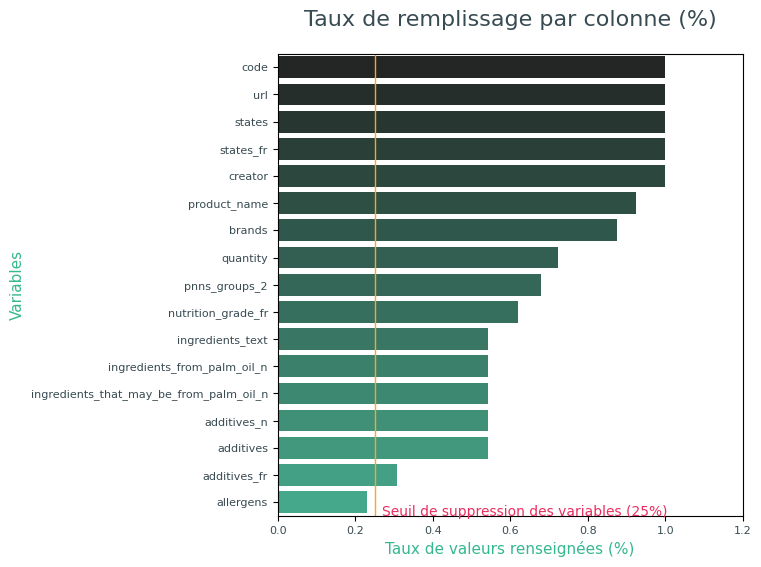

In [38]:
# Select 5 random colors from your palette
random_colors = sns.color_palette("dark:#35B890", n_colors=len(null_values),as_cmap=False)

# Observation of zero values (average per column)
plt.figure(figsize=(6,6))
ax = sns.barplot(data=null_values,x="null_value_rates",y="column_name",palette=random_colors)
plt.title("Taux de remplissage par colonne (%)",pad=20,color="#384B52",fontsize=16)
# Display of a threshold line
plt.axvline(x=0.25, linewidth=1, color = '#ffa51f')
plt.text(0.25+0.02, 16.5, 'Seuil de suppression des variables (25%)', fontsize = 10, color = '#EB2D5F')
# Specifies the location of x-axis labels
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), color='#384B52', fontsize=8)
# Specifies the location of y-axis labels
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticklabels(), color='#384B52', fontsize=8)
# Customise x and y axis labels
plt.xlabel("Taux de valeurs renseignées (%)",color='#35B890', fontsize=11)
plt.ylabel("Variables",color='#35B890', fontsize=11)
plt.show()

L'analyse montre un taux de remplissage identique pour les variables contenant `from_palm_oil`. Elle met également en avant des variables redondantes (`additives`,`states`) et des variables qui ne semblent pas pertinentes (`url`,`creator`,`brands`) pour le projet d'application. Ces variables sont observées pour juger de leurs pertinences.

In [39]:
df_food_fr.loc[:,~df_food_fr.columns.str.contains("100g")].sample(3)

,code,url,creator,product_name,quantity,brands,ingredients_text,allergens,additives_n,additives,additives_fr,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_2,states,states_fr
218762,3270160015924,http://world-fr.openfoodfacts.org/produit/3270...,teolemon,Melon en Billes,450 g,Picard,Melon 100%,NaN,0.0,[ melon-100 -> fr:melon-100 ] [ melon -> fr...,NaN,0.0,0.0,a,fruits,"en:to-be-checked, en:complete, en:nutrition-fa...","A vérifier,Complet,Informations nutritionnelle..."
237755,3560070212262,http://world-fr.openfoodfacts.org/produit/3560...,date-limite-app,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","A compléter,Informations nutritionnelles à com..."
269385,5000128918596,http://world-fr.openfoodfacts.org/produit/5000...,kiliweb,Wholegrain Mustard,NaN,The Co-operative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c,NaN,"en:to-be-completed, en:nutrition-facts-complet...","A compléter,Informations nutritionnelles compl..."


Le contenu des variables restantes démontrent qu'il reste des variables non pertinentes pour le projet. Pour rappel, le projet consiste à proposer des menus plus équilibrés que ceux consommés initialement. 

Ainsi, le lien vers le produits (`url`), le créateur de la page produit (`creator`) et l'état de la fiche produit sont inutiles (`states`,`states_fr`). De plus, les propositions de menus seront basés sur la quantité de nutriments pour 100g. Cela exclu les varibales de quantité (`quantity`) qui donne le poid du produit à l'achat et le détail des ingrédients contenu dans le produit (`ingredients_text`) qui eux, peuvent être des informations intéressantes pour un projet plus avancé... Enfin, les variables `additives` sont redondantes, le projet étant construit sur des produits issus de territoires français, seule la variables `additives_fr` sera conservée.

In [40]:
# Instantiation of columns containing "may_be_from_palm_oil"
col_irrelevant = df_food_fr.loc[:,df_food_fr.columns.str.contains("may_be_from_palm_oil|url|creator|quantity|ingredients_text|states|additives_n|additives$")].columns.tolist()
# Deleting columns
df_food_fr = df_food_fr.drop(columns=col_irrelevant)

##### **2. Nettoyage et mise en forme des données** (variables qualitatives)

Les variables `code` et `product_name` sont les identifiants unique de chaque produits. Ainsi, les doublons et valeurs manquantes seront supprimés après l'analyse du taux de valeurs manquantes. 

In [41]:
# Sum of duplicated values
nb_duplicated = df_food_fr.loc[:,~df_food_fr.columns.str.contains("100g")][["product_name","code"]].duplicated().sum()
print("Nombre de valeurs dupliquée: {}".format(nb_duplicated))

Nombre de valeurs dupliquée: 0


In [42]:
# Counts the number of missing values
missing_percentage_product = df_food_fr.loc[:,~df_food_fr.columns.str.contains("100g")]["product_name"].isnull().sum()
missing_percentage_code = df_food_fr.loc[:,~df_food_fr.columns.str.contains("100g")]["code"].isnull().sum()
# Counts the number of values entered
non_missing_percentage_product = len(df_food_fr) - missing_percentage_product
non_missing_percentage_code = len(df_food_fr) - missing_percentage_code

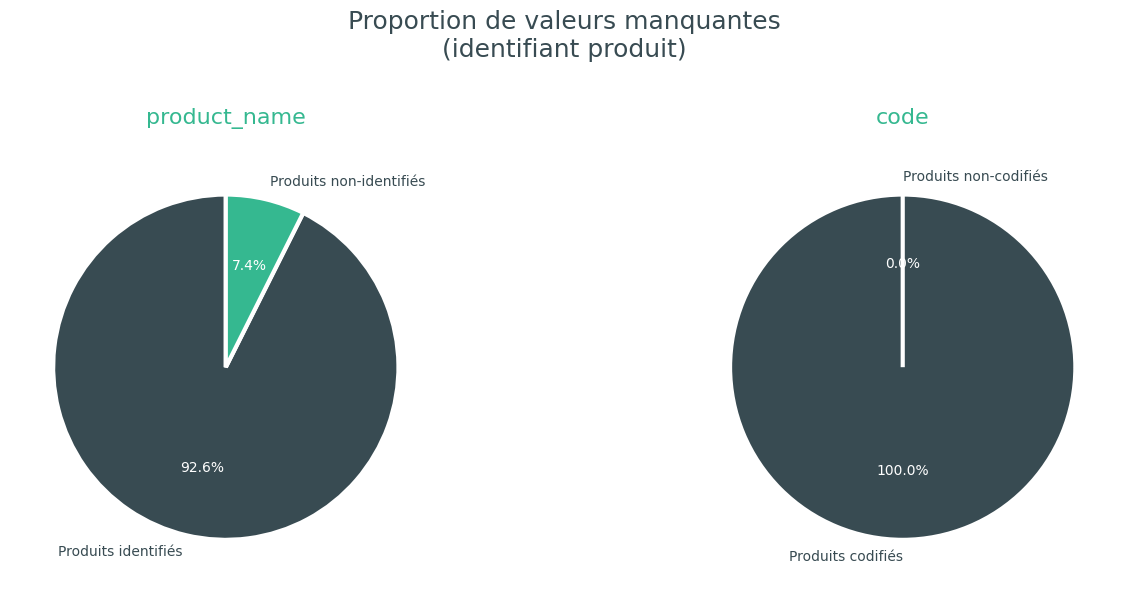

In [43]:
# Data for pie chart - qualitative columns
data_product = [non_missing_percentage_product, missing_percentage_product]
labels_product = ["Produits identifiés", "Produits non-identifiés"]

# Data for pie chart - quantitative columns
data_code = [non_missing_percentage_code, missing_percentage_code]
labels_code = ["Produits codifiés", "Produits non-codifiés"]

colors = ["#384B52","#35B890"]
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
# Add a global title
plt.suptitle("Proportion de valeurs manquantes\n(identifiant produit)\n", fontsize=18, color="#384B52")

# Create pie chart for qualitative columns
patches, texts, autotexts = axs[0].pie(
    data_product, labels=labels_product,
    startangle=90, colors=colors, autopct="%1.1f%%",
    wedgeprops={"linewidth": 3, "edgecolor": "white"})
axs[0].set_title("product_name", pad=20, color="#35B890", fontsize=16)

# Set custom label colors and sizes for qualitative pie chart
for text in texts:
    text.set_color("#384B52")
    text.set_fontsize(10)
for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontsize(10)

# Create pie chart for quantitative columns
patches, texts, autotexts = axs[1].pie(
    data_code, labels=labels_code,
    startangle=90, colors=colors, autopct="%1.1f%%",
    wedgeprops={"linewidth": 3, "edgecolor": "white"})
axs[1].set_title("code", pad=20, color="#35B890", fontsize=16)

# Set custom label colors and sizes for quantitative pie chart
for text in texts:
    text.set_color("#384B52")
    text.set_fontsize(10)
for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontsize(10)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

L'analyse montre qu'il n'y a pas de valeurs dupliquées pour ces variables mais indique que certains produits n'ont pas de nom (`product_name`), ils sont donc supprimés de la base de données.

In [44]:
# Delete lines containing missing values
df_food_fr = df_food_fr.dropna(subset="product_name")

La présence d'allergènes ou d'additifs est une information pertinente mais il n'est pas nécessairement utile d'avoir les détails pour le projet. Ainsi, les valeurs sont remplacées par `1` et `0` lorsqu'il n'y a pas de valeurs. Il en va de même pour la présence d'huile de palme, en précisant que la valeur 0 signifie une absence d'huile de palme; cette valeur est donc remplacée par une valeur manquante et les données sont formater sous la forme `1` ou `0` également. Par soucis de clarté, les valeurs de qualité nutritionnelle sont transformés en majuscule.

In [45]:
# Replace NaN values with 0 and non-NaN values with 1
df_food_fr["additives_fr"] = df_food_fr["additives_fr"].notnull().astype(int)
df_food_fr["allergens"] = df_food_fr["allergens"].notnull().astype(int)
# Replace NaN values with 0 and convert to integer
df_food_fr["ingredients_from_palm_oil_n"] = df_food_fr["ingredients_from_palm_oil_n"].fillna(0).astype(int)
# Replaces the values >= 1
df_food_fr.loc[df_food_fr["ingredients_from_palm_oil_n"] >= 1, "ingredients_from_palm_oil_n"] = 1
# Capitalize values
df_food_fr["nutrition_grade_fr"] = df_food_fr["nutrition_grade_fr"].str.upper()

Pour terminer, la variable catégorielle (`pnns_groups_2`) contient des valeurs dupliquées en raison d'une casse différente. Elle contient également des valeurs "Unknown" qui sont remplacées par `NaN` pour soucis de cohérence. 

In [46]:
# Transformation into capital letters
df_food_fr["pnns_groups_2"] = df_food_fr["pnns_groups_2"].str.capitalize()
# Replace the zero values per Unknown                             
df_food_fr["pnns_groups_2"].replace("Unknown", np.nan, inplace=True)

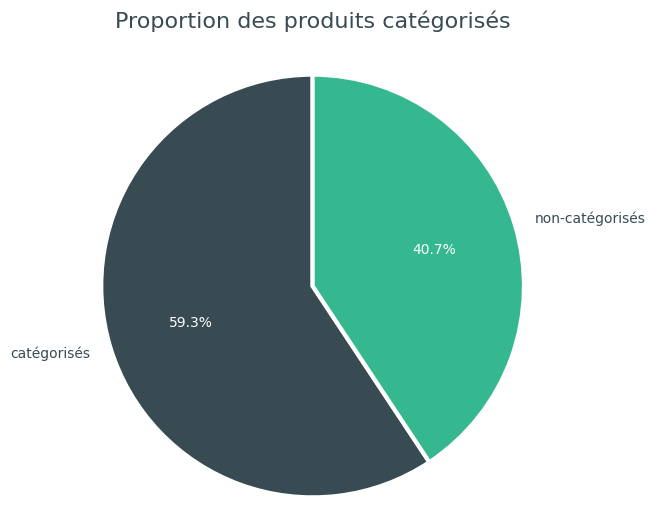

In [47]:
# Calculation of the number of categorized products
product_categ = df_food_fr["pnns_groups_2"].notnull().sum()
product__non_categ = df_food_fr["pnns_groups_2"].isnull().sum()

# Data for pie chart
data = [product_categ, product__non_categ]
labels = ["catégorisés", "non-catégorisés"]
# Define color code
colors = ["#384B52",'#35B890']

# Create pie chart
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(
    data, labels=labels,
    startangle=90, colors=colors, autopct="%1.1f%%",
    wedgeprops = {"linewidth": 3, "edgecolor": "white"})
# Set title on pie chart
plt.title("Proportion des produits catégorisés",pad=20,color="#384B52",fontsize=16)
# Customise label colours and sizes
plt.setp(texts + autotexts, color="#384B52", fontsize=10)
plt.setp(autotexts, color="white")
# Pie chart display
plt.axis("equal")
plt.show()

Observation d'un nuage de mot pour identifier l'importance des groupes pnns.

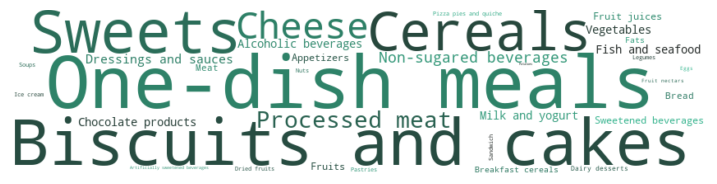

In [48]:
# Create a dictionary where keys are categories and values are their counts
category_dict = df_food_fr["pnns_groups_2"].value_counts().to_dict()

# Create a WordCloud object using the category counts as frequencies
wordcloud = WordCloud(width=850, height=200, background_color='white', colormap=palette_b).generate_from_frequencies(category_dict)

# Display the WordCloud using Matplotlib
plt.figure(figsize=(9, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### **B. Traitement des valeurs nutritionnelles** (variables quantitatives)

Etant donnée que nos produits sont exclusivement issus des territoires français, la variable `nutrition-score-uk_100g` est supprimée.

In [49]:
# Delete column
df_food_fr = df_food_fr.drop(columns="nutrition-score-uk_100g")

Analyse du taux de remplissage des colonnes pour s'assurer de la pertinence des variables restantes.

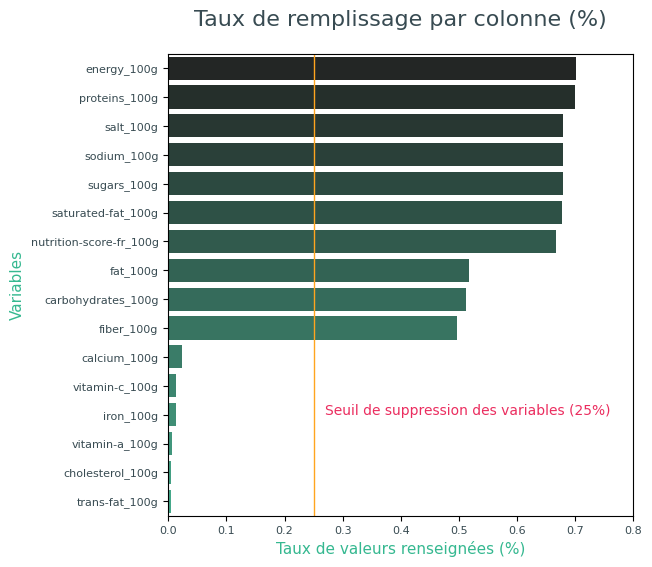

In [50]:
# Instantiation of the percentage of missing values for each column
null_values = df_food_fr.loc[:,df_food_fr.columns.str.contains("100g")].notnull().mean().sort_values(ascending=False)
null_values = null_values.reset_index()
# Rename the columns
null_values.columns = ["column_name", "null_value_rates"]

# Select 5 random colors from your palette
random_colors = sns.color_palette("dark:#35B890", n_colors=len(null_values),as_cmap=False)

# Observation of zero values (average per column)
plt.figure(figsize=(6,6))
ax = sns.barplot(data=null_values,x="null_value_rates",y="column_name",palette=random_colors)
plt.title("Taux de remplissage par colonne (%)",pad=20,color="#384B52",fontsize=16)
# Display of a threshold line
plt.axvline(x=0.25, linewidth=1, color = '#ffa51f')
plt.text(0.25+0.02, 12, 'Seuil de suppression des variables (25%)', fontsize = 10, color = '#EB2D5F')
# Specifies the location of x-axis labels
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), color='#384B52', fontsize=8)
# Specifies the location of y-axis labels
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticklabels(), color='#384B52', fontsize=8)
# Customise x and y axis labels
plt.xlabel("Taux de valeurs renseignées (%)",color='#35B890', fontsize=11)
plt.ylabel("Variables",color='#35B890', fontsize=11)
plt.show()

Plusieurs variables sont en deça du seuil de 25% de valeurs renseignés, elles sont inexploitables et donc supprimées du jeu de données.

In [51]:
# Filter columns with "100g"
col_100g = df_food_fr.columns[df_food_fr.columns.str.contains("100g")]
# Selects variables > 25% of values filled in
col_100g_75_nan = col_100g[df_food_fr[col_100g].notnull().mean() < 0.25]
# Delete column
df_food_fr = df_food_fr.drop(columns=col_100g_75_nan)

Ensuite, les colonnes avec le suffixes `_100g` (hors `ernergy_100g`) doivent contenir des valeurs >= 100. Ainsi, toutes les valeurs dépassants ce seuil sont remplacés par `NaN`. Il en va du même principe pour la variable `ernergy_100g` qui ne peut être supérieur à 3800kJ puisque l'apport énergétique approximatif par gramme de lipides est de 38kJ/g (<a href="[Composition nutritionnelle des aliments](https://fr.wikipedia.org/wiki/Composition_nutritionnelle_des_aliments)">source wikipédia</a>).

In [52]:
# Instantiation of nutritional columns 100g
nutrition_columns = df_food_fr.loc[:,df_food_fr.columns.str.contains("100g")].drop(columns=["energy_100g","nutrition-score-fr_100g"]).columns.tolist()

Observation du nombre de valeurs supérieur à 100g, les données sont ensuite supprimées

In [53]:
# Check for values > 100
nb_outlier_100g = (df_food_fr[nutrition_columns]>100).sum()
print(nb_outlier_100g[nb_outlier_100g > 0])

fat_100g              2
saturated-fat_100g    1
carbohydrates_100g    7
sugars_100g           3
fiber_100g            1
salt_100g             2
dtype: int64


In [54]:
# Count the number of values > 3800
nb_outlier_3800kj = (df_food_fr["energy_100g"]>3800).sum()
print("Nb de valeur > 3800 kJ: {}".format(nb_outlier_3800kj))

Nb de valeur > 3800 kJ: 90


In [55]:
# Replace the values > 100 per NaN
df_food_fr[nutrition_columns] = df_food_fr[nutrition_columns].where(df_food_fr[nutrition_columns] < 100, np.nan)
# Replace the values > 3800 per NaN
df_food_fr.loc[df_food_fr["energy_100g"] > 3800, "energy_100g"] = np.nan

## Outliers

Analyse des éventuelles valeurs aberrantes

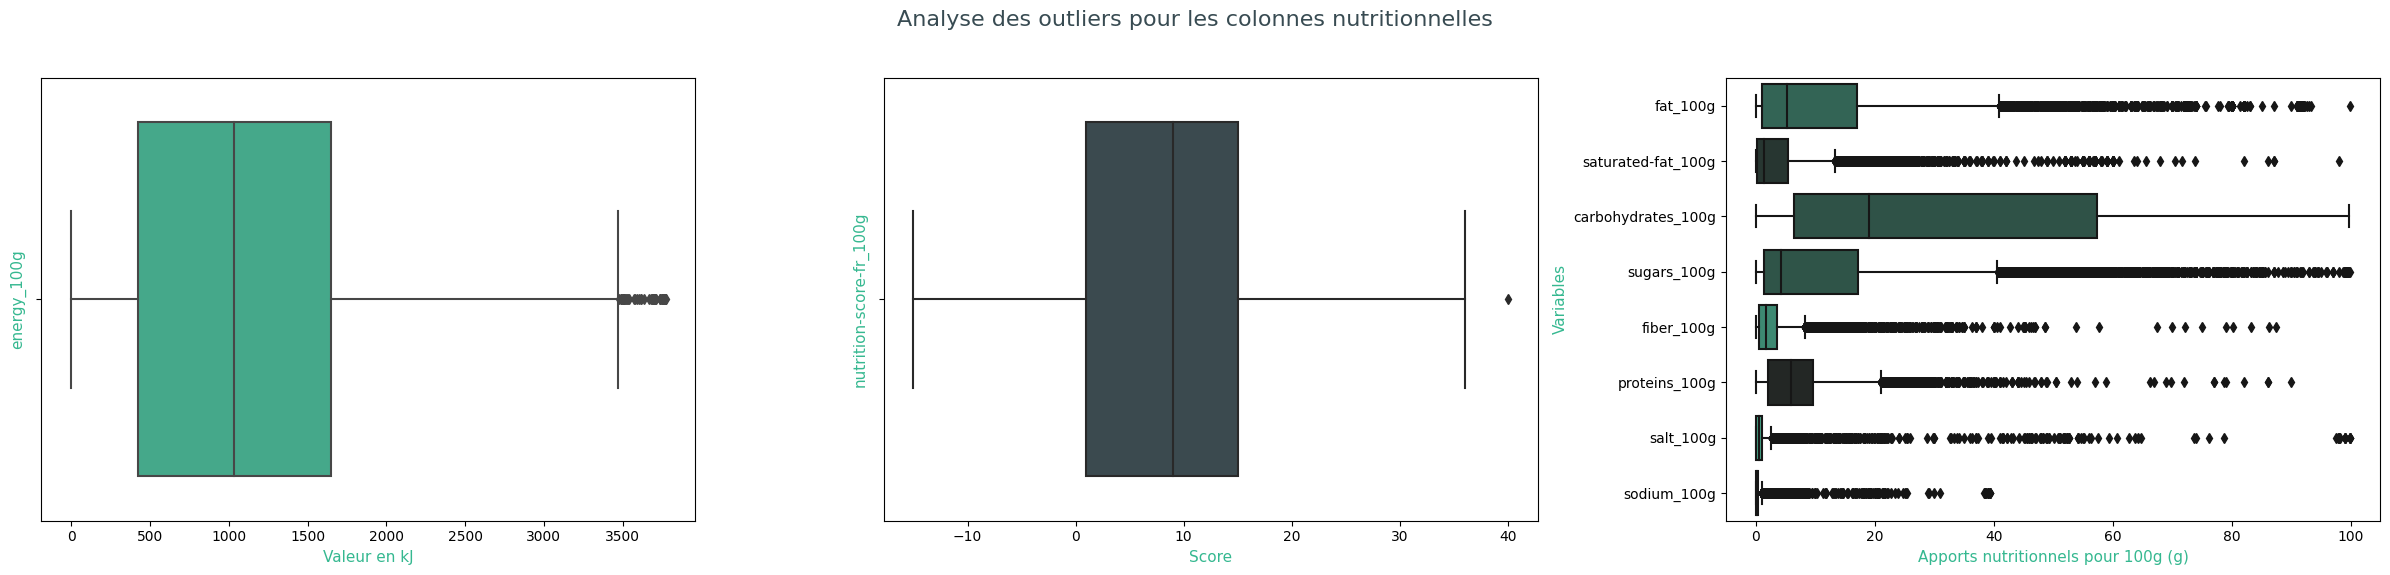

In [56]:
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# Add a global title above the subplots
fig.suptitle("Analyse des outliers pour les colonnes nutritionnelles", fontsize=16, color="#384B52")

# Plot the first boxplot
sns.boxplot(data=df_food_fr, x="energy_100g", ax=axes[0], color="#35B890")
axes[0].set_xlabel("Valeur en kJ", color='#35B890', fontsize=11)
axes[0].set_ylabel("energy_100g", color='#35B890', fontsize=11)

# Plot the second boxplot
sns.boxplot(data=df_food_fr, x="nutrition-score-fr_100g", ax=axes[1], color="#384B52")
axes[1].set_xlabel("Score", color='#35B890', fontsize=11)
axes[1].set_ylabel("nutrition-score-fr_100g", color='#35B890', fontsize=11)

# Select 5 random colors from your palette
random_colors = random.sample(palette_map, len(nutrition_columns))

# Plot the third boxplot
sns.boxplot(data=df_food_fr[nutrition_columns].dropna(), ax=axes[2], palette=random_colors, orient="h")
axes[2].set_xlabel("Apports nutritionnels pour 100g (g)", color='#35B890', fontsize=11)
axes[2].set_ylabel("Variables", color='#35B890', fontsize=11)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave space for the suptitle

# Display the plot
plt.show()


Observation des relations entre paires de variables pour les données numériques du jeu de données

In [57]:
# Select columns containing "100g" or "pnns_groups_2"
df_pairplot = df_food_fr.loc[:, df_food_fr.columns.str.contains("100g") | (df_food_fr.columns == "pnns_groups_2")]
# Select random colors from my palette
random_colors = random.sample(palette_map, len(df_pairplot.loc[:,"pnns_groups_2"].unique()))

# Set up the figure size
plt.figure(figsize=(15,20))
# Create the pairplot with the custom palette
pairplot = sns.pairplot(df_pairplot, corner=True, hue="pnns_groups_2", palette=random_colors)

# Set the global title
plt.suptitle("Pairplot des variables nutritionnelles - Groupes PNNS", y=1.02, fontsize=20, color="#384B52")

# Display the plot
plt.show()

c:\Users\remid\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (37) than needed (36), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\remid\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (37) than needed (36), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\remid\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (37) than needed (36), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\remid\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (37) than needed (36), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\remid\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py

<Figure size 1500x2000 with 0 Axes>

KeyboardInterrupt: 

### **Outliers - salt_100g et sodium_100g**

Dans les faits, **40 % du poids du sel est constitué de sodium** et cela se constate par une relation linéaire "parfaite" entre les variables `salt_100g` et `sodium_100g`. Ainsi, l'une des colonne peut être supprimée sans avoir d'impact sur la qualité des informations nutriotionnelles lié au sel.

In [58]:
# Deleting the sodium column
df_food_fr = df_food_fr.drop(columns="sodium_100g", axis=1)

### **Outliers - saturated-fat_100g et fat_100g**

La relation entre les graisses et les graisses saturées est de la même nature que celle entre le sel et le sodium, à la différence que la relation n'est pas parfaitement linéaire. La relation entre ses deux nutriments se réfère généralement à la proportion de graisses saturées dans l'apport total en graisses. Ainsi, la quantité de graisses saturées ne peut être supérieur à celle des graisses, ces valeurs sont remplacés par `NaN`.

In [59]:
# Eliminating saturated fats > Fat values
df_food_fr.loc[df_food_fr["saturated-fat_100g"] > df_food_fr["fat_100g"],["saturated-fat_100g", "fat_100g"]] = np.nan

### **Outliers - carbohydrates_100g et sugars_100g**

De même, dans la littérature scientifique, il existe une relation étroite entre les hydrates de carbone et le sucre. Les hydrates de carbone (également appelés glucides) sont une classe de composés chimiques qui comprennent différents types de sucres. Les sucres, quant à eux, sont un sous-groupe des hydrates de carbone. Le sucre que nous consommons généralement dans notre alimentation quotidienne est principalement du saccharose, un disaccharide composé de glucose et de fructose. Ainsi, la quantité de sucre ne peut être supérieur à celle des hydrates de carbone, dans le cas contraire le valeurs sont rmeplacées par `NaN`.

In [60]:
# Eliminating sugars > carbohydrates values
df_food_fr.loc[df_food_fr["sugars_100g"] > df_food_fr["carbohydrates_100g"],["sugars_100g", "carbohydrates_100g"]] = np.nan

Maintenant que les valeurs aberrantes identifiée dans l'analyse par paire de variables sont supprimées, les valeurs inférieure et supérieure de l'écart-interquartile sont considérées comme aberrantes et sont supprimées.

Enfin, la dernière étape du nettoyage consiste à supprimer les lignes qui possèdent au moins 2 valeurs. 

In [61]:
# Deletes lines with at least 2 non-null values in columns containing "100g"
df_food_fr.dropna(thresh=2, subset=df_food_fr.columns[df_food_fr.columns.str.contains("100g")], inplace=True)

Observation des valeurs manquantes après l'ensemble du nettoyage. 

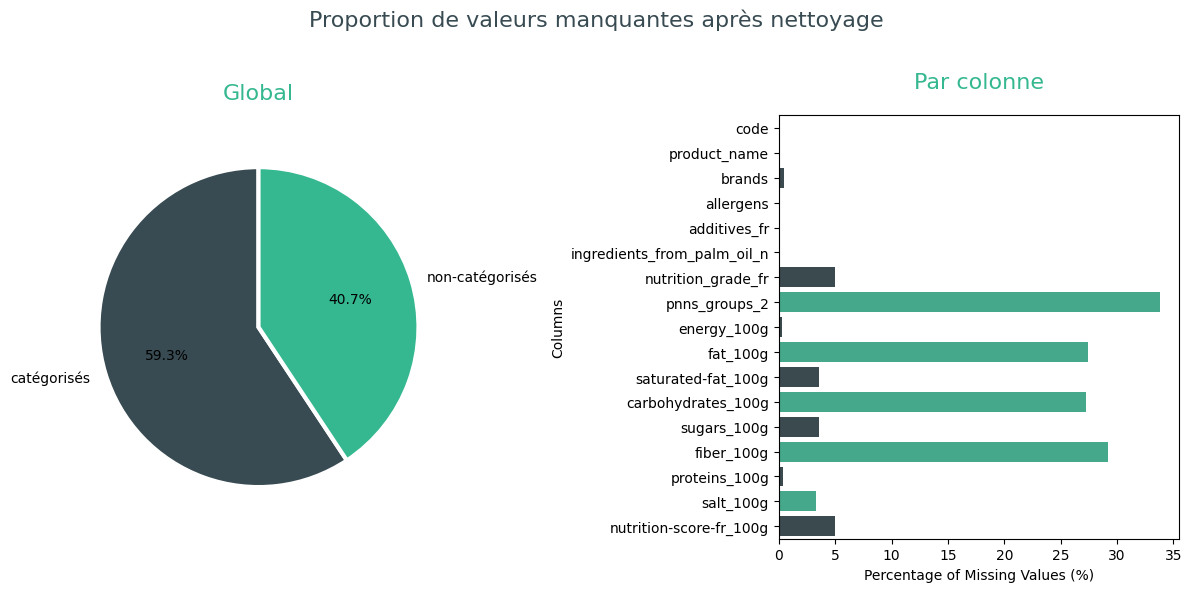

In [62]:
# Calculation of the average percentage of missing values
missing_percentage = df_food_fr.isna().mean().mean()*100
# Calculation of the proportion of non-missing values
non_missing_percentage = 100 - missing_percentage

# Create a figure and two axes for the two plots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
# Add a global title above the subplots
fig.suptitle("Proportion de valeurs manquantes après nettoyage\n", fontsize=16, color="#384B52")

# Fill the first axis with the existing pie chart
axs[0].pie(data, labels=labels, startangle=90, colors=colors, autopct="%1.1f%%", wedgeprops = {"linewidth": 3, "edgecolor": "white"})
axs[0].set_title("Global",pad=20,color="#35B890",fontsize=16)

# For each column in df_food_fr_final, calculate the proportion of missing values
missing_proportions = df_food_fr.isna().mean()

# Transform the missing proportions into a DataFrame for Seaborn
missing_df = pd.DataFrame({
    'Column': missing_proportions.index,
    'Percentage of Missing Values (%)': missing_proportions.values * 100})

# Use sns.barplot to create a horizontal barplot of missing proportions
sns.barplot(x='Percentage of Missing Values (%)', y='Column', data=missing_df, palette=colors, ax=axs[1])

# Set the labels of the axis and the title
axs[1].set_xlabel('Percentage of Missing Values (%)')
axs[1].set_ylabel('Columns')
axs[1].set_title('Par colonne',pad=20,color="#35B890",fontsize=16)

# Adjust the spacings to prevent label overlap
fig.tight_layout()

plt.show()

### Outliers - nutrition-score-fr_100g

Le Nutri-Score a été mis au point par des équipes de recherche internationales indépendantes composées de scientifiques, de médecins et de nutritionnistes, pour rendre les informations nutritionnelles plus faciles à décrypter. Pour classer chaque produit, le Nutri-Score prend en compte, pour 100 grammes de produit, la teneur :

en nutriments et aliments à favoriser : fibres, protéines, fruits et légumes, légumes sec…
en nutriments à limiter : calories, acides gras saturés, sucres, sel
Après calcul, le score obtenu par un produit permet de lui attribuer une lettre et une couleur :

du produit  le plus favorable sur le plan nutritionnel (classé A)
au produit le moins favorable sur le plan nutritionnel (classé E)
Pour tenir compte des spécificités de certaines familles d’aliments telles que les matières grasses ajoutées (beurre, huile), les fromages ou encore les boissons, la méthode de calcul du score a été adaptée. 

In [ ]:
col_nutri = df_food_fr.loc[:, df_food_fr.columns.str.contains("100g")].columns.tolist()

In [ ]:
df_food_fr = df_food_fr.loc[df_food_fr['pnns_groups_2'] != 'Unknown']

### Imputation de la moyenne globale

In [ ]:
# Imputation de la moyenne général
df_mean_brut = df_food_fr[col_nutri].fillna(df_food_fr[col_nutri].mean())

In [ ]:
df_mean_brut.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
count,64302.000000,64302.000000,64302.000000,64302.000000,64302.000000,64302.000000,64302.000000,64302.000000,64302.000000
mean,1111.220836,12.718522,5.407804,27.658709,13.259978,2.542087,7.750603,1.125822,8.688553
std,772.048262,13.221244,8.287757,23.273499,18.430353,3.727060,7.833816,3.787133,8.814140
min,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,-15.000000
25%,427.000000,2.600000,0.300000,7.500000,1.100000,0.500000,1.800000,0.080000,1.000000
50%,1036.000000,12.718522,2.100000,27.658709,4.500000,2.542087,6.000000,0.600000,8.688553
75%,1645.000000,14.000000,7.000000,38.000000,16.000000,2.542087,10.900000,1.200000,15.000000
max,3774.000000,99.900000,99.000000,99.900000,99.900000,99.000000,99.000000,99.822000,40.000000


In [ ]:
df_food_mean_pnns = df_food_fr.copy()  # Copie du DataFrame d'origine
df_food_knn_pnns = df_food_fr.copy()  # Copie du DataFrame d'origine

### Imputation de la moyenne par pnns_groups_2

In [ ]:
# Supprimer les lignes avec des valeurs 'NaN' dans la colonne 'pnns_groups_2'
df_food_mean_pnns.dropna(subset=['pnns_groups_2'], inplace=True)

# Calcul de la moyenne des groupes de nutrition
mean_pnns = df_food_mean_pnns.loc[:, ['pnns_groups_2'] + col_nutri].groupby('pnns_groups_2').mean()

# Parcourir chaque colonne qui pourrait avoir des NaN
for col in col_nutri:
    # Utiliser apply() pour remplacer les NaN dans la colonne actuelle par la moyenne du groupe 'pnns_groups_2'
    df_food_mean_pnns[col] = df_food_mean_pnns.apply(
        # fonction lambda pour remplacer NaN par la moyenne 'pnns_groups_2' correspondante 
        lambda row: mean_pnns.loc[row['pnns_groups_2'], col] if pd.isna(row[col]) else row[col],
        axis=1
    )

In [ ]:
mean_pnns.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,1014.875022,12.367328,4.610191,23.858498,10.597576,2.504743,7.254481,0.773063,7.548660
std,718.158638,14.732344,5.985144,22.142323,13.028321,2.633502,6.177756,0.704094,6.579115
min,94.691225,0.076913,0.028699,0.736125,0.521120,0.019677,0.156599,0.017980,-4.986328
25%,422.812391,3.305574,1.118127,5.689292,2.069168,0.441307,2.377512,0.171806,2.899702
50%,881.718051,8.567530,2.704503,17.012601,5.110867,1.578707,6.622684,0.561102,7.337578
75%,1441.958492,14.858852,5.600272,48.922845,15.255682,3.484169,10.320489,1.213362,12.952722
max,3027.760981,74.072759,29.778820,69.119688,50.418663,9.692308,19.855332,2.621968,21.667413


### Imputation via KNN-Imputer

In [ ]:
# Calcul de la médiane des groupes de nutrition
knn_pnns = df_food_knn_pnns.loc[:, col_nutri]
knn_imputer = KNNImputer(n_neighbors=5)  # Vous pouvez ajuster le nombre de voisins selon votre besoin
df_imputed = knn_imputer.fit_transform(knn_pnns)
df_imputed = pd.DataFrame(df_imputed, columns=col_nutri)

In [ ]:
print(df_imputed.index)
print(df_food_knn_pnns.index)

RangeIndex(start=0, stop=64302, step=1)
Index([   106,    138,    190,    191,    226,    234,    240,    242,    279,
          283,
       ...
       320689, 320690, 320698, 320702, 320734, 320740, 320741, 320751, 320757,
       320763],
      dtype='int64', length=64302)


In [ ]:
df_imputed.index = df_food_knn_pnns.index

In [ ]:
df_food_knn_pnns.loc[:, col_nutri] = df_imputed

In [ ]:
df_food_knn_pnns.describe()

,allergens,additives_fr,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
count,64302.000000,64302.000000,64302.000000,64302.000000,64302.000000,64302.000000,64302.000000,64302.000000,64302.000000,64302.000000,64302.000000,64302.000000
mean,0.316724,0.421698,0.053373,1111.154367,13.376874,5.396250,25.164860,13.316109,2.548717,7.744765,1.144221,8.851016
std,0.465202,0.493835,0.224778,772.596489,15.595128,8.365632,25.064649,18.715819,4.251038,7.843425,3.875282,9.004834
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,-15.000000
25%,0.000000,0.000000,0.000000,427.000000,1.300000,0.300000,4.320000,1.000000,0.100000,1.800000,0.080000,1.000000
50%,0.000000,0.000000,0.000000,1033.000000,7.200000,2.000000,14.200000,4.200000,1.100000,6.000000,0.580000,9.000000
75%,1.000000,1.000000,0.000000,1645.000000,21.400000,7.400000,45.000000,17.800000,3.000000,11.000000,1.260000,16.000000
max,1.000000,1.000000,1.000000,3774.000000,99.900000,99.000000,99.900000,99.900000,99.000000,99.000000,99.822000,40.000000


### Analyse des imputations

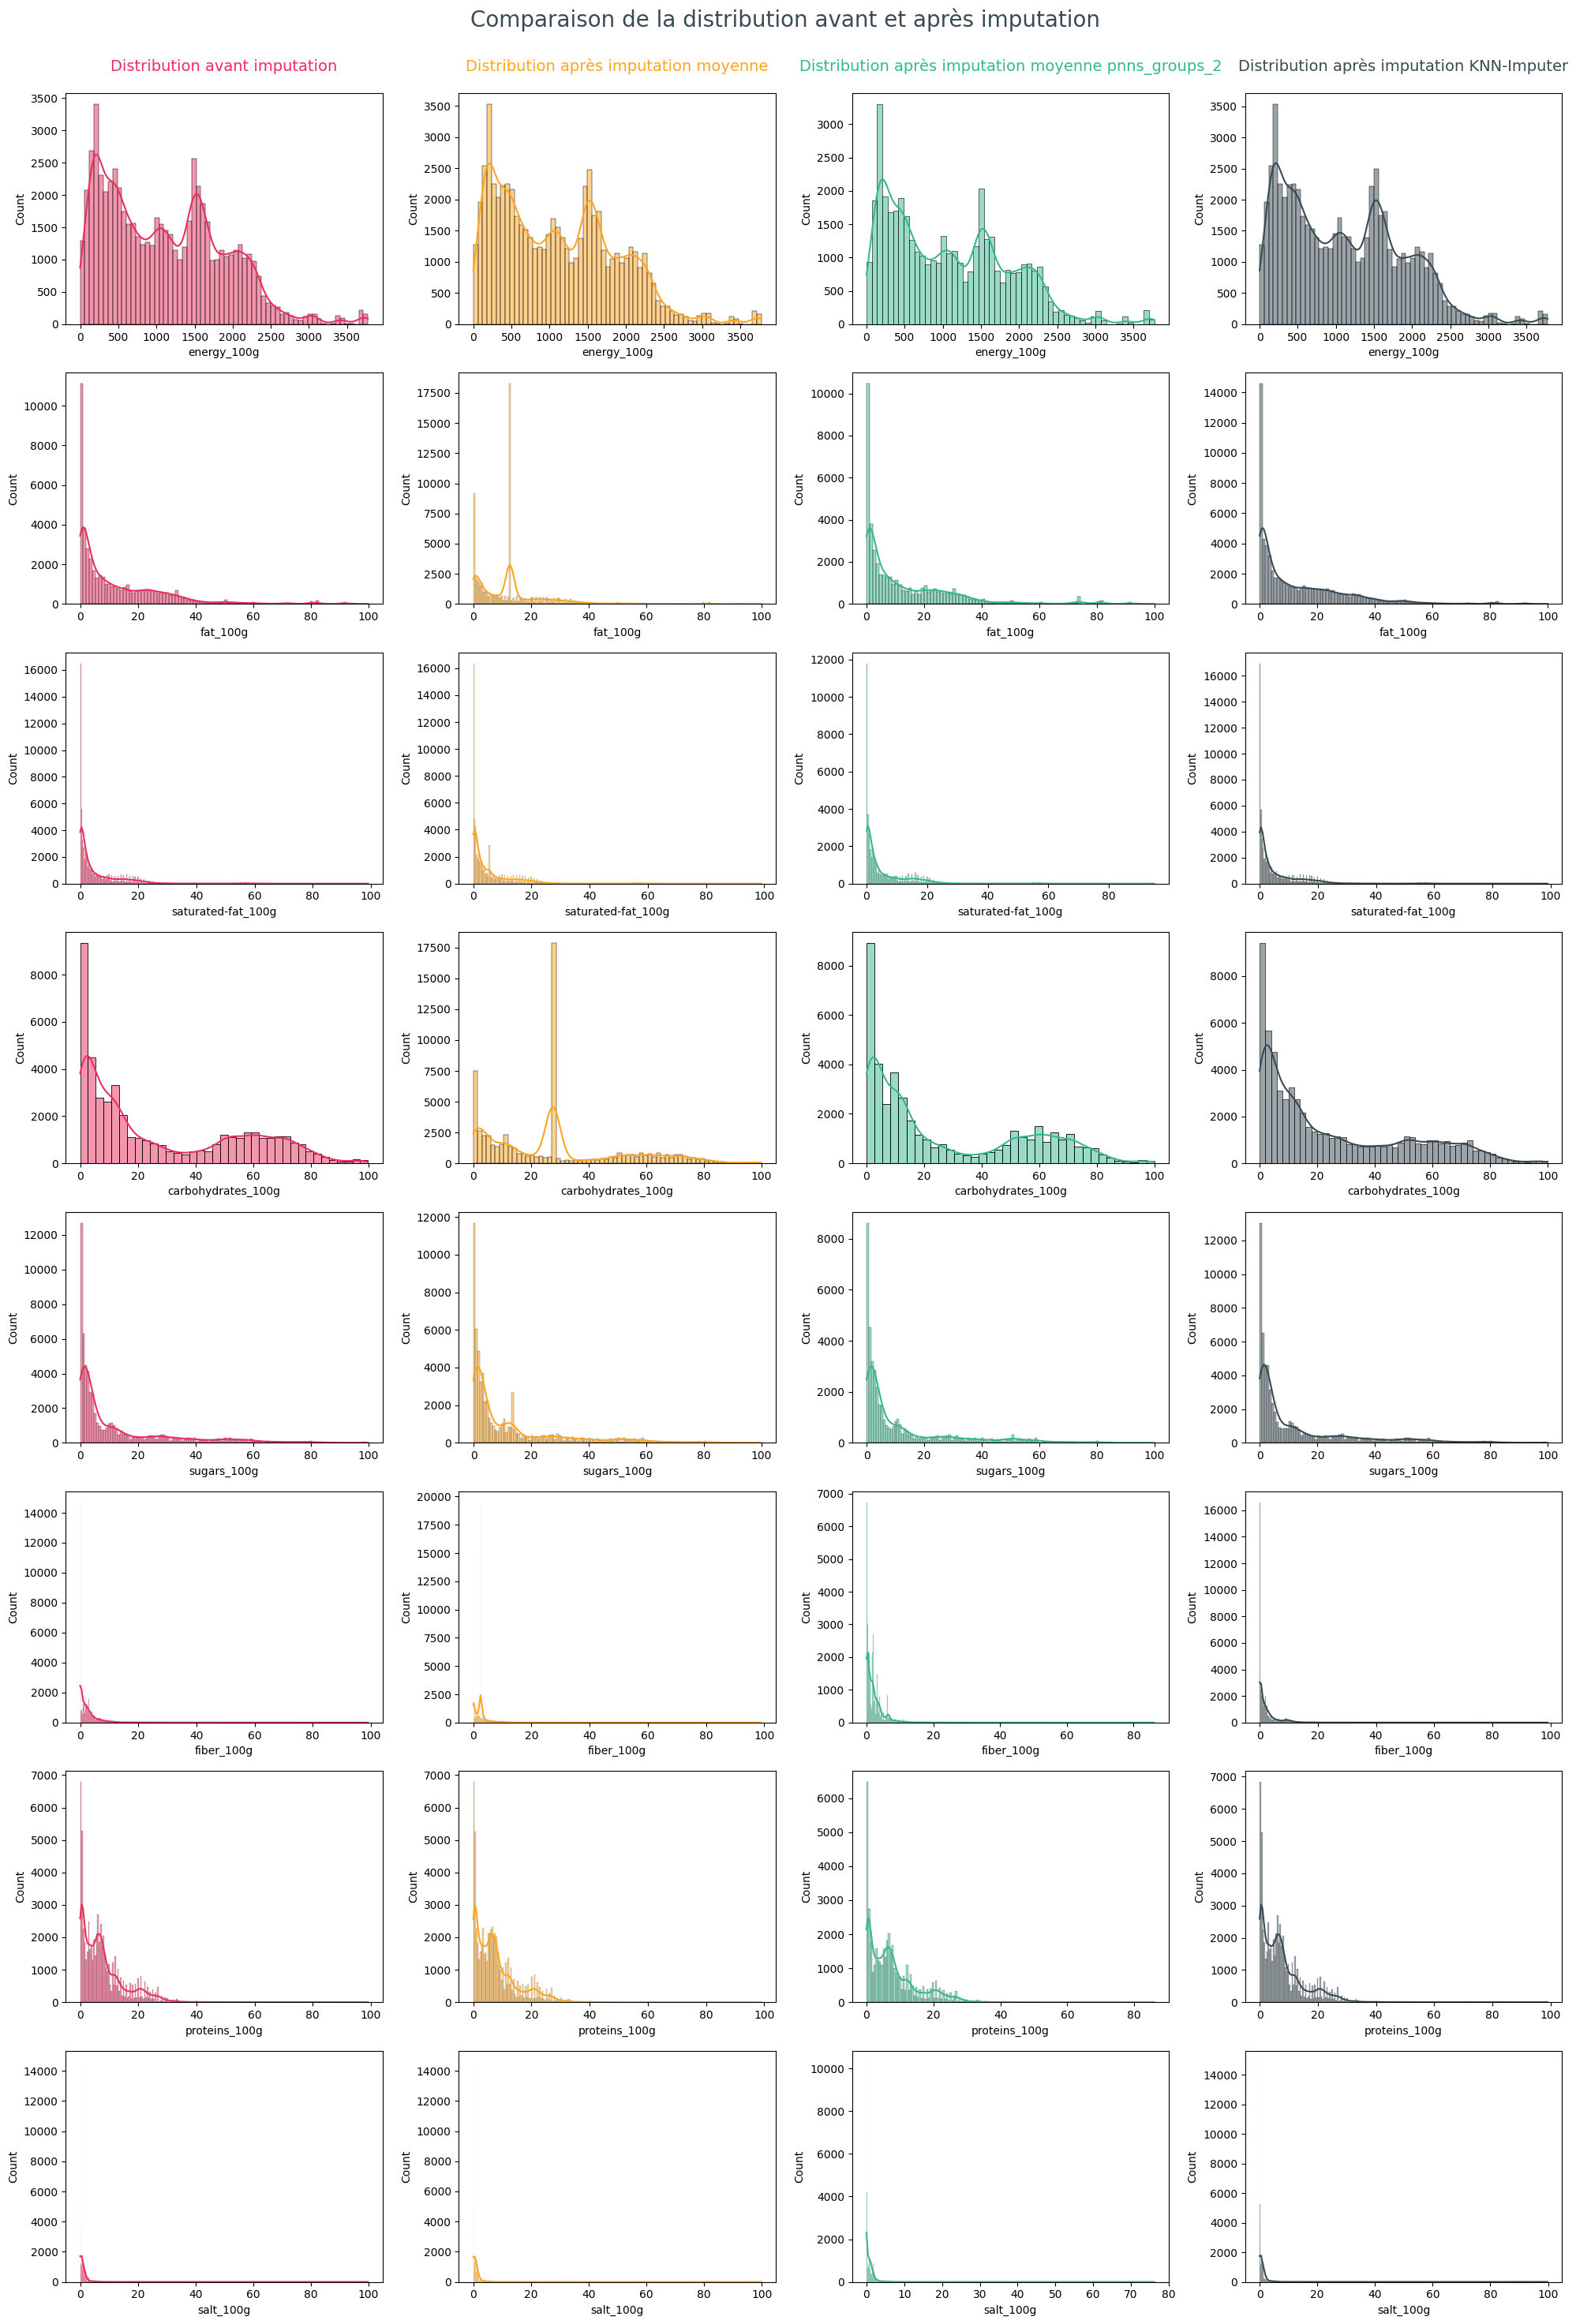

In [ ]:
# Palette de couleurs
palette_map = ["#EB2D5F", "#ffa51f", "#35B890", "#384B52"]

# Liste des colonnes nutritionnelles
col_nutri = ["energy_100g", "fat_100g", "saturated-fat_100g", "carbohydrates_100g", "sugars_100g", "fiber_100g", "proteins_100g", "salt_100g"]

# Créer une grille de sous-graphiques avec 4 colonnes
fig, axes = plt.subplots(len(col_nutri), 4, figsize=(20, 30))
# Titre global
fig.suptitle("Comparaison de la distribution avant et après imputation\n\n", fontsize=20, color="#384B52")

# Boucle sur les colonnes nutritionnelles
for i, col in enumerate(col_nutri):

    sns.histplot(data=df_food_fr, x=col, ax=axes[i, 0], color=palette_map[0], kde=True)
    if i == 0:
        axes[i, 0].set_title(f"Distribution avant imputation", pad=20, color=palette_map[0], fontsize=14)

    # Distribution après imputation moyenne
    sns.histplot(data=df_mean_brut, x=col, ax=axes[i, 1], color=palette_map[1], kde=True)
    if i == 0:
        axes[i, 1].set_title(f"Distribution après imputation moyenne", pad=20, color=palette_map[1], fontsize=14)

    # Distribution après imputation moyenne pnns_groups_2
    sns.histplot(data=df_food_mean_pnns, x=col, ax=axes[i, 2], color=palette_map[2], kde=True)
    if i == 0:
        axes[i, 2].set_title(f"Distribution après imputation moyenne pnns_groups_2", pad=20, color=palette_map[2], fontsize=14)

    # Distribution après imputation écart-type
    sns.histplot(data=df_food_knn_pnns, x=col, ax=axes[i, 3], color=palette_map[3], kde=True)
    if i == 0:
        axes[i, 3].set_title(f"Distribution après imputation KNN-Imputer", pad=20, color=palette_map[3], fontsize=14)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()

# Conclusion

L'analyse de distribution avant et après les différentes méthodes d'imputations montre que les données n'ont pas une distribution dite normale. Ainsi, la moyenne ne peut être utilisée pour imputer les valeurs manquantes, c'est donc la méthode des KNN-imputer qui est retenue puisqu'elle influe peu sur la distribution des données.

In [ ]:
# Aperçu des données finales
df_food_knn_pnns.sample(5)

,code,product_name,brands,allergens,additives_fr,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
66098,0055742370348,Cranberries Dried and Sweetened,Compliments,0,0,0,NaN,Dried fruits,544.0,0.5,1.22,33.0,26.0,2.00,0.0,0.046764,10.2
194199,3106220032733,Saucisses cocktail,"Sans marque,CGC",0,1,0,D,Processed meat,925.0,19.2,7.40,0.6,0.0,0.28,11.8,1.480000,15.0
276490,5400141079708,Multifruit,Boni,0,0,0,C,Fruit juices,192.0,0.1,0.10,10.2,10.1,0.20,0.3,0.010000,4.0
203212,3242272864356,Simple & Bon! Duo de Saumon,Sodebo,1,0,0,B,Sandwich,997.0,8.7,0.90,30.0,2.6,10.14,9.7,1.270000,2.0
250203,3700311801255,Lardons nature,Tous les jours,0,1,0,E,Processed meat,1254.0,27.0,12.00,2.0,1.3,0.00,13.0,3.500000,23.0


In [ ]:
# Description du jeu de données
df_food_knn_pnns.shape

(64302, 17)

In [ ]:
# Exportation
df_food_knn_pnns.to_csv("C:/Users/remid/Documents/_OC_ParcoursDataScientist/P3_Concevez_Une_Application_Au_Service_De_La_Sante_Publique/OpenFoodFact/foodfact_final.csv", index=False)